참고자료:https://github.com/justmarkham/pandas-videos/blob/master/top_25_pandas_tricks.ipynb

In [1]:
import pandas as pd
import numpy as np

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')
movies = pd.read_csv('http://bit.ly/imdbratings')
orders = pd.read_csv('http://bit.ly/chiporders', sep='\t')
orders['item_price'] = orders.item_price.str.replace('$', '').astype('float')
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])
titanic = pd.read_csv('http://bit.ly/kaggletrain')
ufo = pd.read_csv('http://bit.ly/uforeports', parse_dates=['Time'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


# 1. 설치 버전 확인
- 판다스의 버전을 알아야 할 때가 있다.
- 아래 코드로 판다스의 버전을 알 수 있다.

In [3]:
pd.__version__

'1.3.5'

- 하지만 판다스의 종속된 것들의 버전을 알고 싶으면, `show_version()`를 사용하면 된다.

In [4]:
pd.show_versions()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)



INSTALLED VERSIONS
------------------
commit           : 66e3805b8cabe977f40c05259cc3fcf7ead5687d
python           : 3.7.13.final.0
python-bits      : 64
OS               : Linux
OS-release       : 5.4.188+
Version          : #1 SMP Sun Apr 24 10:03:06 PDT 2022
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.3.5
numpy            : 1.21.6
pytz             : 2022.1
dateutil         : 2.8.2
pip              : 21.1.3
setuptools       : 57.4.0
Cython           : 0.29.30
pytest           : 3.6.4
hypothesis       : None
sphinx           : 1.8.6
blosc            : None
feather          : 0.4.1
xlsxwriter       : None
lxml.etree       : 4.2.6
html5lib         : 1.0.1
pymysql          : None
psycopg2         : 2.7.6.1 (dt dec pq3 ext lo64)
jinja2           : 2.11.3
IPython          : 5.5.0
pandas_datareader: 0.9.0
bs4              : 4.6.3
bottleneck       : 1

- python, pandas, numpy등의 버전을 모두 확인할 수 있다.

# 2. 예제 데이터프래임 만들기
- 판다스의 코드를 실행시켜보고 싶으면 데이터프래임이 있어야 한다.
- 다양한 방법이 있지만 사전 자료형을 데이터프래임의 구조로 쓰는 것을 좋아한다.
- 사전의 키는 열의 이름이 되고 값들은 열의 값들이 된다.


In [5]:
df = pd.DataFrame({'col one':[100, 200], 'col two':[300, 400]})
df

,col one,col two
0,100,300
1,200,400


- 좀더 커다란 데이터프래임을 사용하고 싶으면 일일이 타이핑하기 힘드니 넘파이의 `random.rand()`를 사용하면 된다.

In [6]:
pd.DataFrame(np.random.rand(4,8))

,0,1,2,3,4,5,6,7
0,0.646289,0.619289,0.169817,0.155710,0.590982,0.779857,0.890949,0.395502
1,0.221527,0.148892,0.837127,0.978799,0.624491,0.561448,0.153547,0.986016
2,0.849698,0.890820,0.434381,0.920288,0.243821,0.226711,0.151704,0.443643
3,0.003492,0.636000,0.263111,0.888795,0.759672,0.033769,0.950140,0.943189


- 이것은 좋은 방법이지만 열의 이름이 숫자가 아닌 경우를 만들어주고 싶으면 열변수를 이용하면 된다.

In [7]:
pd.DataFrame(np.random.rand(4, 8), columns=list('abcdefgh'))

,a,b,c,d,e,f,g,h
0,0.376758,0.319601,0.741662,0.471862,0.802125,0.834256,0.128533,0.923735
1,0.492901,0.678842,0.702915,0.036687,0.396267,0.719887,0.413841,0.139245
2,0.933161,0.910312,0.813835,0.325243,0.084092,0.030779,0.901710,0.505678
3,0.775056,0.825155,0.333228,0.226697,0.674013,0.594599,0.639939,0.500392


- 문자의 갯수는 열의 갯수와 같아야 한다.

# 3. 열이름 재정의
- 아까 만들었던 예제 데이터프래임을 보자

In [8]:
df

,col one,col two
0,100,300
1,200,400


- 판다스 열을 선택하기 위해 점표기법을 선호하지만, 열 이름에 공백이 있어서 작동하지 않을 것이다. 이것을 고쳐보자
- 열 이름을 바꾸는 가장 유연한 방법은 `rename()`매서드이다. 
- 키가 이전 이름이고 값이 새로운 이름인 사전을 전달하고, 축을 지정해준다.

In [9]:
df = df.rename({'col one':'col_one', 'col two':'col_two'}, axis = 'columns')
df

,col_one,col_two
0,100,300
1,200,400


- 이 방법의 좋은 점은 전체이든 한개이든 열의 개수와 상관없이 이름을 새로 만들어줄 수 있는 것이다.
- 만약 열 전체의 이름을 한번에 바꾸고 싶다면, 아래 방법으로 데이터프래임의 열에 덮어씌우면 된다.

In [10]:
df.columns = ['col_1', 'col_2']
df

,col_1,col_2
0,100,300
1,200,400


- 띄어쓰기를 밑줄로 바꿔쓰고 싶다면 `replace()`를 사용하면 된다.

In [11]:
df.columns = df.columns.str.replace(' ', '_')
df

,col_1,col_2
0,100,300
1,200,400


In [12]:
df.columns = df.columns.str.replace('_', ' ') # 밑줄을 공백으로 바꿔줄 수 도 있다.
df

,col 1,col 2
0,100,300
1,200,400


- 열의 이름의 앞이나 뒤에 추가를 하고 싶으면 `add_perfix()`, `add_serfix()`를 이용하면 된다.

In [13]:
df.add_prefix('X_')

,X_col 1,X_col 2
0,100,300
1,200,400


In [14]:
df.add_suffix('_Y')

,col 1_Y,col 2_Y
0,100,300
1,200,400


# 4. 행 순서 바꾸기
- drinks의 데이터프래임을 살펴보자
- 이 데이터셋은 국가의 평균 알콜 소비량에 대한 것이다.
- 행을 뒤집는 방법중 가장 간결한 방법은 파이썬 배열에 하듯이 `loc`에 접근해 `::-1`인덱스를 전달하는 것이다.

In [15]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [16]:
drinks.loc[::-1].head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
192,Zimbabwe,64,18,4,4.7,Africa
191,Zambia,32,19,4,2.5,Africa
190,Yemen,6,0,0,0.1,Asia
189,Vietnam,111,2,1,2.0,Asia
188,Venezuela,333,100,3,7.7,South America


- 인덱스를 0부터 시작하도록 만들고 싶다면 `reset_index()`를 사용하면 된다.
- 이렇게 하게되면 행은 뒤집혔지만 인덱스는 0부터 시작하여 행만 뒤집힌 것처럼 보이는 효과를 얻을 수 있다.

In [17]:
drinks.loc[::-1].reset_index(drop=True).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Zimbabwe,64,18,4,4.7,Africa
1,Zambia,32,19,4,2.5,Africa
2,Yemen,6,0,0,0.1,Asia
3,Vietnam,111,2,1,2.0,Asia
4,Venezuela,333,100,3,7.7,South America


# 5. 열 순서 뒤집기
- 비슷하게 열에 대해서 `loc`으로 뒤집을 수 있다.
- [ : ,  : : -1]에서 콤마전에 오는 콜론은 전체를 선택하라는 의미이다. 그리고 뒤에오는  : : -1은 열을 뒤집는 의미이다.

In [18]:
drinks.loc[:, ::-1].head()

,continent,total_litres_of_pure_alcohol,wine_servings,spirit_servings,beer_servings,country
0,Asia,0.0,0,0,0,Afghanistan
1,Europe,4.9,54,132,89,Albania
2,Africa,0.7,14,0,25,Algeria
3,Europe,12.4,312,138,245,Andorra
4,Africa,5.9,45,57,217,Angola


# 6. 열의 자료형 선택
- drinks 데이터프래임의 자료형이다.

In [19]:
drinks.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

- 숫자로 이루어진 열만 선택하고 싶으면 `select_dtypes()`를 사용하면 된다.

In [20]:
drinks.select_dtypes(include = 'number').head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7
3,245,138,312,12.4
4,217,57,45,5.9


- 이것들은 정수형과 실수형을 모두 포함한다.
- 객체들만 따로 뽑아낼 수 도 있다.

In [21]:
drinks.select_dtypes(include='object').head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


- 여러 자료형을 배열형식으로 전달해줄 수 도 있다.

In [22]:
drinks.select_dtypes(include=['number', 'object', 'category', 'datetime']).head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


- 특정 자료형만 빼고 뽑아낼 수 도 있다.

In [23]:
drinks.select_dtypes(exclude='number').head()

,country,continent
0,Afghanistan,Asia
1,Albania,Europe
2,Algeria,Africa
3,Andorra,Europe
4,Angola,Africa


# 7. 문자를 숫자로 변환
- 예제 데이터프래임을 하나더 만들어보자.

In [24]:
df = pd.DataFrame({'col_one':['1.1', '2.2', '3.3'],
                   'col_two':['4.4', '5.5', '6.6'],
                   'col_three':['7.7', '8.8', '-']})
df

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,-


- 이 숫자들은 문자로 되어있다.
- 열로 확인해볼 수 있다.

In [25]:
df.dtypes

col_one      object
col_two      object
col_three    object
dtype: object

- 열을 수학적으로 작동시키기 위해 숫자형으로 자료형을 바꿔줘야 한다.
- `astype()`으로 앞에 2열만 바꿔보자

In [26]:
df.astype({'col_one':'float', 'col_two':'float'}).dtypes

col_one      float64
col_two      float64
col_three     object
dtype: object

- 하지만 세번째 열을 바꾸려 하면 오류가 발생한다.
- 0을 의미하는 - 기호가 있는데 이것은 판다스가 어떻게 다룰지 모르기 때문이다.
- 대신에 `to_numeric()` 함수를 세번째 열에 적용시켜 `NaN`값으로 변환시켜줄 수 있다.

In [27]:
pd.to_numeric(df.col_three, errors='coerce')

0    7.7
1    8.8
2    NaN
Name: col_three, dtype: float64

- 만약 `NaN`이 확실하게 0을 의미한다면, `fillna()`를 이용해 0을 매꿔줄 수 있다.

In [28]:
pd.to_numeric(df.col_three, errors='coerce').fillna(0)

0    7.7
1    8.8
2    0.0
Name: col_three, dtype: float64

- 마지막으로 `apply()`로 이 기능들을 데이터프래임 전체에 적용시켜줄 수 있다.
- 모든 자료형이 실수형으로 바뀌었기 떄문에 이 한줄로 한방에 목표를 달성할 수 있다.

In [29]:
df = df.apply(pd.to_numeric, errors = 'coerce').fillna(0)
df

,col_one,col_two,col_three
0,1.1,4.4,7.7
1,2.2,5.5,8.8
2,3.3,6.6,0.0


In [30]:
df.dtypes

col_one      float64
col_two      float64
col_three    float64
dtype: object

# 8. 데이터프레임 크기 줄이기
- 판다스의 데이터프레임은 메모리에 딱맞게 설계되었고 시스템과 함께 작동하기 위해서는 크기를 줄일 필요가 가끔 있다.

In [31]:
drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 30.5 KB


- 30.5kb 의 메모리를 사용중이다.
- 만약 성능문제가 생기거나 메모리를 읽을 수 없다면 파일을 읽어내는 동안 데이터프래임의 크기를 줄여주는 2가지 해결방법이 있다.
- 첫번째 방법은 필요한 열만 일어내는 `usecols`변수이다.

In [32]:
cols = ['beer_servings', 'continent']
small_drinks = pd.read_csv('http://bit.ly/drinksbycountry', usecols=cols)
small_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   beer_servings  193 non-null    int64 
 1   continent      193 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.7 KB


- 단지 이 2열을 읽어내는 일에 13.6kb의 데이터프레임크기를 소모했다.
- 두번째 방법은 카테고리형 데이터를 포함하는 모든 객체 열을 `dtype`매개변수로 지정하는 카테고리 데이터 유형으로 변환하는 것이다.

In [33]:
dtypes = {'continent':'category'}
smaller_drinks = pd.read_csv('http://bit.ly/drinksbycountry', usecols=cols, dtype=dtypes)
smaller_drinks.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   beer_servings  193 non-null    int64   
 1   continent      193 non-null    category
dtypes: category(1), int64(1)
memory usage: 2.4 KB


- 2.3kb밖에 사용하지 않았다.
- 카테고리 자료형은 행의 수에 비해 적은 수의 카테고리가 있으면 메모리 사용량을 줄일 수 있다는 것을 명심해야 한다.

# 9. 여러 파일들로 데이터프래임만들기(행단위)
- 데이터셋이 여러 파일에 나눠져 있는데 한개의 데이터프래임으로 만들고 싶을 때가 있다.

In [34]:
stocks = pd.read_csv('http://bit.ly/smallstocks', parse_dates=['Date'])

In [35]:
stocks1 = pd.DataFrame({'Data':['2016-10-03','2016-10-03','2016-10-03'], # 데이터 셋을 따로 여러개를 만든다.
                   'Close':['31.50','112.50','51.50'],
                   'Volume':['14070500', '21701800', '19189500'],
                    'Symbol':['CSCO', 'AAPL', 'MSFT']})
stocks1

,Data,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.50,21701800,AAPL
2,2016-10-03,51.50,19189500,MSFT


In [36]:
stocks2 = pd.DataFrame({'Data':['2016-10-04','2016-10-04','2016-10-04'], 
                   'Close':['131.50','12.50','31.50'],
                   'Volume':['22070500', '19701800', '11189500'],
                    'Symbol':['AAPL', 'CSCO', 'MSFT']})
stocks2

,Data,Close,Volume,Symbol
0,2016-10-04,131.50,22070500,AAPL
1,2016-10-04,12.50,19701800,CSCO
2,2016-10-04,31.50,11189500,MSFT


- CSV파일을 가져와 합친뒤 원본을 삭제하면 되지만, 그러면 메모리를 비효율적으로 사용하고 코드를 많이 짜야하기 떄문에 별로이다.
- glob모듈을 사용하면 좋다.

In [37]:
from glob import glob

- `glob()`를 이용해 와일드카드 문자를 포함하여 패턴을 적용시킬 수 있다. 그러면 패턴에 해당하는 모든 파일들을 배열로 받아올 것이다.
- 이 경우에 'stocks'로 시작하는 모든 csv 파일을 위한 서브디렉토리를 가져올 것이다.

In [38]:
stocks1.to_csv('stocks1.csv')

In [39]:
stocks2.to_csv('stocks2.csv')

In [40]:
dfRead = pd.read_csv('./stocks1.csv')
dfRead

,Unnamed: 0,Data,Close,Volume,Symbol
0,0,2016-10-03,31.5,14070500,CSCO
1,1,2016-10-03,112.5,21701800,AAPL
2,2,2016-10-03,51.5,19189500,MSFT


In [41]:
dfRead = pd.read_csv('./stocks2.csv')
dfRead

,Unnamed: 0,Data,Close,Volume,Symbol
0,0,2016-10-04,131.5,22070500,AAPL
1,1,2016-10-04,12.5,19701800,CSCO
2,2,2016-10-04,31.5,11189500,MSFT


- 위에서 사용하려고 만들었던 예제 데이터프래임을 드라이브에 저장하여 불러와보았다.

In [42]:
stock_files = sorted(glob('./stocks*.csv'))
stock_files

['./stocks1.csv', './stocks2.csv']

- 위에서 저장했던 csv파일들이 배열로 정상적으로 나온다.

In [43]:
pd.concat((pd.read_csv(file) for file in stock_files))

,Unnamed: 0,Data,Close,Volume,Symbol
0,0,2016-10-03,31.5,14070500,CSCO
1,1,2016-10-03,112.5,21701800,AAPL
2,2,2016-10-03,51.5,19189500,MSFT
0,0,2016-10-04,131.5,22070500,AAPL
1,1,2016-10-04,12.5,19701800,CSCO
2,2,2016-10-04,31.5,11189500,MSFT


- 불행히도 인덱스 번호도 복제가 되었다. 이것을 피하기 위해 `concat()`에게 인덱스를 무시하고 정수 인덱스 기본값을 대신 사용하라고 하면 된다.

In [44]:
pd.concat((pd.read_csv(file) for file in stock_files), ignore_index=True)

,Unnamed: 0,Data,Close,Volume,Symbol
0,0,2016-10-03,31.5,14070500,CSCO
1,1,2016-10-03,112.5,21701800,AAPL
2,2,2016-10-03,51.5,19189500,MSFT
3,0,2016-10-04,131.5,22070500,AAPL
4,1,2016-10-04,12.5,19701800,CSCO
5,2,2016-10-04,31.5,11189500,MSFT


# 10. 여러 파일들로 데이터프래임만들기(열단위)
- 이전 트릭은 행을 포함하는 파일일때 유용하다.
- 열 단위로 쪼개진 파일을 합쳐볼 데이터 셋을 만들어 사용해보겠다.

In [45]:
drinks1 = pd.DataFrame({'country':['Afghanistan','Albania','Algeria'], # 데이터 셋을 따로 여러개를 만든다.
                   'beer_servings':['0','89','25'],
                   'spirit_servings':['0', '132', '0']})
drinks1

,country,beer_servings,spirit_servings
0,Afghanistan,0,0
1,Albania,89,132
2,Algeria,25,0


In [46]:
drinks2 = pd.DataFrame({'wine_servings':['0','54','14'], # 데이터 셋을 따로 여러개를 만든다.
                   'total_litres_of_pure_alcohol':['0.0','4.9','0.7'],
                   'continent':['Asia', 'Europe', 'Africa']})
drinks2

,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0.0,Asia
1,54,4.9,Europe
2,14,0.7,Africa


- 이 데이터프래임 2개도 위에 문제처럼 저장한후 `glob()`와 `concat()`으로 묶어보겠다.

In [47]:
drinks1.to_csv('drinks1.csv')

In [48]:
drinks2.to_csv('drinks2.csv')

In [49]:
drinks_files = sorted(glob('./drinks*.csv'))
drinks_files

['./drinks1.csv', './drinks2.csv']

In [50]:
pd.concat((pd.read_csv(file) for file in drinks_files), axis='columns').head()

,Unnamed: 0,country,beer_servings,spirit_servings,Unnamed: 0,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0,0,0,0,0.0,Asia
1,1,Albania,89,132,1,54,4.9,Europe
2,2,Algeria,25,0,2,14,0.7,Africa


- 데이터프레임이 6개의 열이 되었다.

# 11. 클립보드로부터 데이터프래임만들기
- 엑셀이나 구글시트에 디에터를 가지고 있고 이것을 빠르게 데이터프래임으로 만들고 싶다.
- 이 데이터를 클립보드로 복사해온다.
- 그리고, `read_clipboard()`을 사용해 데이터프래임으로 읽어올 수 있다.

In [51]:
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], columns=['A', 'B', 'C'])
df

,A,B,C
0,1,2,3
1,4,5,6


In [52]:
df.dtypes

A    int64
B    int64
C    int64
dtype: object

# 12. 데이터프래임을 2개의 랜덤부분집합으로 쪼개기
- 3대1비율로 행을 기준으로 데이터프래임을 쪼개고 싶다.
- 979개의 행이있는 데이터프래임으로 예를 들겠다.

In [53]:
len(movies)

979

- `sample()`매소드로 75% 비율의 행으로 'movies_1'데이터프래임으로 만들어줄 수 있다.

In [54]:
movies_1 = movies.sample(frac = 0.75, random_state=1234)
movies_1

,star_rating,title,content_rating,genre,duration,actors_list
387,8.0,Midnight Cowboy,X,Drama,113,"[u'Dustin Hoffman', u'Jon Voight', u'Sylvia Mi..."
653,7.7,Fearless,PG-13,Action,104,"[u'Jet Li', u'Li Sun', u'Yong Dong']"
40,8.5,The Green Mile,R,Crime,189,"[u'Tom Hanks', u'Michael Clarke Duncan', u'Dav..."
913,7.5,Suspiria,X,Horror,92,"[u'Jessica Harper', u'Stefania Casini', u'Flav..."
766,7.6,The Little Mermaid,G,Animation,83,"[u'Jodi Benson', u'Samuel E. Wright', u'Rene A..."
...,...,...,...,...,...,...
368,8.0,Planet of the Apes,G,Adventure,112,"[u'Charlton Heston', u'Roddy McDowall', u'Kim ..."
505,7.8,About Time,R,Drama,123,"[u'Domhnall Gleeson', u'Rachel McAdams', u'Bil..."
595,7.7,The Purple Rose of Cairo,PG,Comedy,82,"[u'Mia Farrow', u'Jeff Daniels', u'Danny Aiello']"
940,7.4,Much Ado About Nothing,PG-13,Comedy,111,"[u'Kenneth Branagh', u'Emma Thompson', u'Keanu..."


- 그리고 `drop()`으로 앞에서만든 행들을 다 없에고 'movies_2'를 만들어 줄 수 있다.

In [55]:
movies_2 = movies.drop(movies_1.index)
movies_2

,star_rating,title,content_rating,genre,duration,actors_list
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
10,8.8,The Lord of the Rings: The Fellowship of the Ring,PG-13,Adventure,178,"[u'Elijah Wood', u'Ian McKellen', u'Orlando Bl..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
...,...,...,...,...,...,...
954,7.4,X-Men,PG-13,Action,104,"[u'Patrick Stewart', u'Hugh Jackman', u'Ian Mc..."
960,7.4,The Way Way Back,PG-13,Comedy,103,"[u'Steve Carell', u'Toni Collette', u'Allison ..."
968,7.4,The English Patient,R,Drama,162,"[u'Ralph Fiennes', u'Juliette Binoche', u'Will..."
970,7.4,Wonder Boys,R,Drama,107,"[u'Michael Douglas', u'Tobey Maguire', u'Franc..."


In [56]:
len(movies_1) + len(movies_2)

979

- 쪼갠 데이터프래임들이 인덱스를 확인해볼 수 있다.

In [57]:
movies_1.index.sort_values()

Int64Index([  0,   2,   5,   6,   7,   8,   9,  11,  13,  16,
            ...
            966, 967, 969, 971, 972, 974, 975, 976, 977, 978],
           dtype='int64', length=734)

In [58]:
movies_2.index.sort_values()

Int64Index([  1,   3,   4,  10,  12,  14,  15,  18,  26,  30,
            ...
            931, 934, 937, 941, 950, 954, 960, 968, 970, 973],
           dtype='int64', length=245)

# 13. 데이터프레임을 여러 카테고리로 필터처리하기
- 영화 데이터프레임을 장르기준으로 보자

In [59]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [60]:
movies.genre.unique()

array(['Crime', 'Action', 'Drama', 'Western', 'Adventure', 'Biography',
       'Comedy', 'Animation', 'Mystery', 'Horror', 'Film-Noir', 'Sci-Fi',
       'History', 'Thriller', 'Family', 'Fantasy'], dtype=object)

- 영화장르를 액션 또는 드라마 또는 서부로 보고 싶다면 or 기능을 사용할 수 있다.

In [61]:
movies[(movies.genre == 'Action') |
       (movies.genre == 'Drama') |
       (movies.genre == 'Western')].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."


- 하지만 위 코드를 `isin()`으로 좀더 깔끔하게 쓸 수 있다.

In [62]:
movies[movies.genre.isin(['Action', 'Drama', 'Western'])].head()

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."


In [63]:
movies[~movies.genre.isin(['Action', 'Drama', 'Western'])].head() # 제외옵션을 사용할 수 있다. '~' 을 사용한다.

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."


# 14. 큰 카테고리로 데이터프레임 필터씌우기
- 영화 데이터프레임을 가장 큰 3개의 장르로 필터화하고 싶다.
- `value_counts()`로 개수로써 시리즈화하여 저장할 수 있다.

In [64]:
counts = movies.genre.value_counts()
counts

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
History        1
Fantasy        1
Name: genre, dtype: int64

In [65]:
counts.nlargest(3) # nlargest() 가장 큰것들을 개수를 매개변수로 받아온다.

Drama     278
Comedy    156
Action    136
Name: genre, dtype: int64

In [66]:
counts.nlargest(3).index # 인덱스로 시리즈화 하기

Index(['Drama', 'Comedy', 'Action'], dtype='object')

In [67]:
movies[movies.genre.isin(counts.nlargest(3).index)].head() #isin()과 index같이 사용하기

,star_rating,title,content_rating,genre,duration,actors_list
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
11,8.8,Inception,PG-13,Action,148,"[u'Leonardo DiCaprio', u'Joseph Gordon-Levitt'..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."


# 15. 결측치 다루기
- ufo데이터셋을 보자
- 몇몇 값이 결측되었는데 얼마나 많은 것들이 결측되었는지 `isna()`와 `sum()`으로 확인해보자

In [68]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00


In [69]:
ufo.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

- missingno라이브러리로 결측치를 시각화 해보았다.

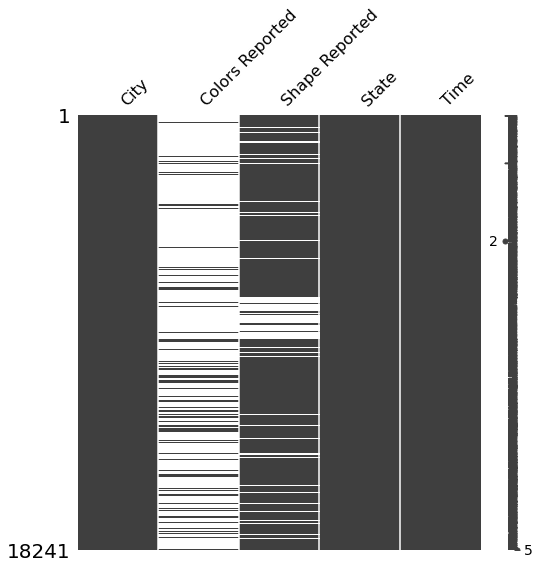

In [70]:
import missingno as msno
msno.matrix(df=ufo.iloc[:,:], figsize=(8,8))

- `isna()`는 데이터프래임의 참거짓값을 만들어내고 `sum()`은 참을 1로 변화시켜 더해준다.
- 비슷하게 `mean()`, `isna()`으로 비율을 퍼센테이지로 볼 수 있다.

In [71]:
ufo.isna().mean()

City               0.001371
Colors Reported    0.842004
Shape Reported     0.144948
State              0.000000
Time               0.000000
dtype: float64

- 결측치가 있는 열을 없에고 싶으면 `dropna()`를 쓰면된다.

In [72]:
ufo.dropna(axis='columns').head()

,State,Time
0,NY,1930-06-01 22:00:00
1,NJ,1930-06-30 20:00:00
2,CO,1931-02-15 14:00:00
3,KS,1931-06-01 13:00:00
4,NY,1933-04-18 19:00:00


- 10%이상 결측된 열을 없에고 싶으면 옵션을 이용하면 된다.

In [73]:
ufo.dropna(thresh = len(ufo)*0.9, axis='columns').head()

,City,State,Time
0,Ithaca,NY,1930-06-01 22:00:00
1,Willingboro,NJ,1930-06-30 20:00:00
2,Holyoke,CO,1931-02-15 14:00:00
3,Abilene,KS,1931-06-01 13:00:00
4,New York Worlds Fair,NY,1933-04-18 19:00:00


- len(ufo)는 행의 전체 개수를 가져오고 0.9를 곱해줌으로써 90%의 값이 사라지지않은 것들만 가져오게 했다.

# 16. 문자를 여러 열로 쪼개기
- 예제 데이터프래임을 만들어보자

In [74]:
df = pd.DataFrame({'name':['John Arthur Doe', 'Jane Ann Smith'],
                   'location':['Los Angeles, CA', 'Washington, DC']})
df

,name,location
0,John Arthur Doe,"Los Angeles, CA"
1,Jane Ann Smith,"Washington, DC"


- 'name'열을 3개의 열로 쪼개고 싶으면 `str.split()`을 사용하면된다.

In [75]:
df.name.str.split(' ',expand = True)

,0,1,2
0,John,Arthur,Doe
1,Jane,Ann,Smith


- 이 3개의 열은 하나의 지시로 원본 데이터프래임으로 저장될 수 있다.

In [76]:
df[['first', 'middle', 'last']] = df.name.str.split(' ', expand=True)
df

,name,location,first,middle,last
0,John Arthur Doe,"Los Angeles, CA",John,Arthur,Doe
1,Jane Ann Smith,"Washington, DC",Jane,Ann,Smith


# 17. series를 데이터프래임으로 확장하기
- 예제 데이터프래임을 만들어보자

In [77]:
df = pd.DataFrame({'col_one':['a', 'b', 'c'], 'col_two':[[10, 40], [20, 50], [30, 60]]})
df

,col_one,col_two
0,a,"[10, 40]"
1,b,"[20, 50]"
2,c,"[30, 60]"


- 두개의 열이 있고 두번째 열은 정수의 파이썬 배열을 포함한다.
- 만약 두번째 열을 따로 데이터프래임으로 확장하고 싶다면 `apply()`를 사용하면된다.

In [78]:
df_new = df.col_two.apply(pd.Series)
df_new

,0,1
0,10,40
1,20,50
2,30,60


- 그리고 `concat()`으로 기존것과 새로운것을 묶어준다.

In [79]:
pd.concat([df, df_new], axis='columns')

,col_one,col_two,0,1
0,a,"[10, 40]",10,40
1,b,"[20, 50]",20,50
2,c,"[30, 60]",30,60


# 18. 여러 기능으로 집계하기
- Chipotle 레스토랑의 주문에대한 데이터프레임을 보자

In [80]:
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


- 각 주문은 order_id를 가지고 하나에서 여러개의 행으로 이루져있다.
- 주문 가격의 합계를 뽑아내기 위해서 아이디에 따른 가격을 합해야 된다.
- 예를 들어 주문번호 1번을 보자

In [81]:
orders[orders.order_id == 1].item_price.sum()

11.56

- 만약 각 주문번호에 따른 가격합계를 계산하고싶으면 `groupby()`를 주문번호에 따라 사용해주면 된다.

In [82]:
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

- 여러 기능으로 집계하려면 `agg()`메서드와 배열로 여러 기능을 넣어주면 된다.

In [83]:
orders.groupby('order_id').item_price.agg(['sum', 'count']).head()

,sum,count
order_id,,
1,11.56,4
2,16.98,1
3,12.67,2
4,21.00,2
5,13.70,2


# 19. 집계 결과를 데이터프래임으로 합치기
- 주문 데이터프레임을 보자

In [84]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


- 합계 금액으로 새로운 열을 만들고 싶다.
- 위에서 만들었던것을 다시 불러오자

In [85]:
orders.groupby('order_id').item_price.sum().head()

order_id
1    11.56
2    16.98
3    12.67
4    21.00
5    13.70
Name: item_price, dtype: float64

- `sum()`은 집계함이다.
- 이것은 입력데이터의 버전을 감소시켜 반환한다.
- 다른의미로 이 함수의 결과이다.

In [86]:
len(orders.groupby('order_id').item_price.sum()) # 함수의 입력값보다 적다

1834

In [87]:
len(orders.item_price)

4622

- 해결방법은 `transform()`을 사용하는 것이다.
- 같은 계산결과이지만 입력 데이터와 같은shape의 데이터출력을 반환한다.

In [88]:
total_price = orders.groupby('order_id').item_price.transform('sum')
len(total_price)

4622

In [89]:
orders['total_price'] = total_price # 반환값을 저장할 수 있다.
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56
1,1,1,Izze,[Clementine],3.39,11.56
2,1,1,Nantucket Nectar,[Apple],3.39,11.56
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67
6,3,1,Side of Chips,NaN,1.69,12.67
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70


- 각 주문의 전체금액을 매 행마다 보여준다.
- 비율을 편하게 계산하게 해준다.

In [90]:
orders['percent_of_total'] = orders.item_price / orders.total_price
orders.head(10)

,order_id,quantity,item_name,choice_description,item_price,total_price,percent_of_total
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39,11.56,0.206747
1,1,1,Izze,[Clementine],3.39,11.56,0.293253
2,1,1,Nantucket Nectar,[Apple],3.39,11.56,0.293253
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39,11.56,0.206747
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98,16.98,1.000000
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98,12.67,0.866614
6,3,1,Side of Chips,NaN,1.69,12.67,0.133386
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75,21.00,0.559524
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25,21.00,0.440476
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25,13.70,0.675182


# 20. 행과 열을 쪼개어 선택하기
- 유명한 타이타닉 데이터셋을 가져오자.
- 타이타닉 승객의 생존여부와 세부사항이 담겨있다.
- `describe()`으로 수학적인 요약을 볼 수 있다.

In [91]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [92]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- 하지만, 데이터프래임의 결과는 보고싶은 것 보다 더 많은 정보를 보여준다.
- 만약 필터를 적용하여 보고싶다면 `loc`을 사용하면 된다.

In [93]:
titanic.describe().loc['min':'max'] #최소부터 최대까지 짤라서 보여준다

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
min,1.0,0.0,1.0,0.420,0.0,0.0,0.0000
25%,223.5,0.0,2.0,20.125,0.0,0.0,7.9104
50%,446.0,0.0,3.0,28.000,0.0,0.0,14.4542
75%,668.5,1.0,3.0,38.000,1.0,0.0,31.0000
max,891.0,1.0,3.0,80.000,8.0,6.0,512.3292


- 모든 열에대해서 알 필요가 없으면 열도 짜르면 된다.

In [94]:
titanic.describe().loc['min':'max', 'Pclass':'Parch']

,Pclass,Age,SibSp,Parch
min,1.0,0.420,0.0,0.0
25%,2.0,20.125,0.0,0.0
50%,3.0,28.000,0.0,0.0
75%,3.0,38.000,1.0,0.0
max,3.0,80.000,8.0,6.0


# 21.여러인덱스화 되어있는 Series를 reshape하기
- 타이타닉 데이터셋은 1과 0으로 만들어진 'Survived'열을 가지고있다.
- 그래서 평균으로 비율을 계산해볼 수 있다.

In [95]:
titanic.Survived.mean()

0.3838383838383838

- 만약 생존비율을 'Sex'에 대해 보고싶으면 'groupby()'하면된다.

In [96]:
titanic.groupby('Sex').Survived.mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

- 2개의 다른 카테고리로 비율을 확인해볼 수 도 있다.

In [97]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

- 범례를 쪼개서 보려면 `unstack()`를 사용하면된다.

In [98]:
titanic.groupby(['Sex', 'Pclass']).Survived.mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


# 22. 피봇테이블 만들기
- 만약 아래같은 데이터프래임을 자주 만든다면 `pivot_table()`을 만들어 편리하게 사용할 수 있다.

In [99]:
titanic.pivot_table(index = 'Sex', columns ='Pclass', values='Survived', aggfunc='mean')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


- 피봇테이블과 함께 즉시 인덱스, 열, 값, 집계 기능을 특정할 수 있다.
- 피봇테이블의 이점을 추가할 수 있다.
- 행과 열의 합계를 쉽계 추가할 수 있다.

In [100]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='mean', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [101]:
titanic.pivot_table(index='Sex', columns='Pclass', values='Survived', aggfunc='count', margins=True) # 개수를 값으로 볼 수 있다.

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


# 23. 연속적인 데이터를 카테고리 데이터로 변환하기
- 타이타닉의 데이터셋의 'Age'열은 연속적이라고 볼 수 있다.
- 나이를 3단계로 `cut()`으로 분류하여 카테고리화 해보자

In [102]:
titanic.Age.head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [103]:
pd.cut(titanic.Age, bins = [0, 18, 25, 99], labels = ['child', 'young adult', 'adult']).head(10)

0    young adult
1          adult
2          adult
3          adult
4          adult
5            NaN
6          adult
7          child
8          adult
9          child
Name: Age, dtype: category
Categories (3, object): ['child' < 'young adult' < 'adult']

- 나이때 별로 카테고리화 해주었다

# 24. 보여주기 옵션 바꾸기
- 타이타닉 데이터셋을 다르게 보자


In [104]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- 어떤 실수는 1자리수까지 나오고 어떤거는 4자리수까지 나온다
- 2개까지만 보이도록 `set_option()`으로 정규화해보자.

In [105]:
pd.set_option('display.float_format', '{:.2f}'.format)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [106]:
# 원상복구시키기
pd.reset_option('display.float_format')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 25. 데이터프래임의 스타일
- 이전 트릭은 전체에 대해서 보이는 것을 바꾸는 데에는 유용하다.
- 하지만 더 유연하고 강력한 접근법이 있다.

In [107]:
stocks

,Date,Close,Volume,Symbol
0,2016-10-03,31.50,14070500,CSCO
1,2016-10-03,112.52,21701800,AAPL
2,2016-10-03,57.42,19189500,MSFT
3,2016-10-04,113.00,29736800,AAPL
4,2016-10-04,57.24,20085900,MSFT
5,2016-10-04,31.35,18460400,CSCO
6,2016-10-05,57.64,16726400,MSFT
7,2016-10-05,31.59,11808600,CSCO
8,2016-10-05,113.05,21453100,AAPL


In [108]:
format_dict = {'Date':'{:%m/%d/%y}', 'Close':'${:.2f}', 'Volume':'{:,}'}
stocks.style.format(format_dict)

,Date,Close,Volume,Symbol
0,10/03/16,$31.50,"14,070,500",CSCO
1,10/03/16,$112.52,"21,701,800",AAPL
2,10/03/16,$57.42,"19,189,500",MSFT
3,10/04/16,$113.00,"29,736,800",AAPL
4,10/04/16,$57.24,"20,085,900",MSFT
5,10/04/16,$31.35,"18,460,400",CSCO
6,10/05/16,$57.64,"16,726,400",MSFT
7,10/05/16,$31.59,"11,808,600",CSCO
8,10/05/16,$113.05,"21,453,100",AAPL


- `style.format()`으로 미리 만들어둔 형식을 적용시켜줄 수 있다.

In [109]:
(stocks.style.format(format_dict)
 .hide_index()
 .highlight_min('Close', color='red')
 .highlight_max('Close', color='lightgreen')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


- 최소와 최대에 색깔을 입혀줄 수 도 있다.

In [110]:
(stocks.style.format(format_dict)
 .hide_index()
 .background_gradient(subset='Volume', cmap='Blues')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


- 바탕색을 줄 수도 있는데 값의 크기에 따라 색의 그라데이션을 조절해준다.

In [111]:
(stocks.style.format(format_dict)
 .hide_index()
 .bar('Volume', color='lightblue', align='zero')
 .set_caption('Stock Prices from October 2016')
)

Date,Close,Volume,Symbol
10/03/16,$31.50,"14,070,500",CSCO
10/03/16,$112.52,"21,701,800",AAPL
10/03/16,$57.42,"19,189,500",MSFT
10/04/16,$113.00,"29,736,800",AAPL
10/04/16,$57.24,"20,085,900",MSFT
10/04/16,$31.35,"18,460,400",CSCO
10/05/16,$57.64,"16,726,400",MSFT
10/05/16,$31.59,"11,808,600",CSCO
10/05/16,$113.05,"21,453,100",AAPL


- 값의 크기에 따라 bar차트를 배경으로 넣어줄 수도 있다.

# 보너스 : 데이터프레임 프로파일링

In [112]:
import pandas_profiling

In [ ]:
# 오류
pandas_profiling.ProfileReport(titanic)